# Sentiment Analysis of Real-time Flipkart Product Reviews

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df=pd.read_csv("/Users/prashantheleshala/Desktop/DESKTOP/INTERNSHIP/INNOMATICS /ML_PROJECT/reviews_data_dump/reviews_badminton/data.csv")

In [82]:
df.head(10)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5
7,Flipkart Customer,Classy product,"Certified Buyer, Panjim",59.0,13.0,Oct 2018,Good quality original shuttles.READ MORE,5
8,Jafar Qureshi,Great product,"Certified Buyer, Sheopur",14.0,1.0,Aug 2018,AwesomeREAD MORE,5
9,Bheemesh,Just wow!,"Certified Buyer, Kurnool",50.0,12.0,May 2018,nice original productsREAD MORE,5


In [83]:
df.tail(10)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8508,NaN,NaN,NaN,NaN,NaN,NaN,No complaints about the item . Its the best on...,5
8509,NaN,NaN,NaN,NaN,NaN,NaN,Not sure why we have charged for this product ...,1
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [85]:
df.describe()

,Up Votes,Down Votes,Ratings
count,8508.000000,8508.000000,8518.000000
mean,0.391396,0.121768,4.181028
std,11.613909,3.248022,1.262200
min,0.000000,0.000000,1.000000
25%,0.000000,0.000000,4.000000
50%,0.000000,0.000000,5.000000
75%,0.000000,0.000000,5.000000
max,889.000000,219.000000,5.000000


In [86]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

# Handling Null values:

In [87]:
df['Review text'].fillna(df['Review text'].mode()[0],inplace=True)

In [88]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          0
Ratings              0
dtype: int64

# Check  duplicate values and removing them:

In [89]:
df.duplicated().sum()

4

In [90]:
df = df.drop_duplicates()

In [91]:
df.head(10)

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5
6,Flipkart Customer,Must buy!,"Certified Buyer, Doom Dooma",403.0,121.0,Jan 2020,BEST PURCHASE It is a good quality and is more...,5
7,Flipkart Customer,Classy product,"Certified Buyer, Panjim",59.0,13.0,Oct 2018,Good quality original shuttles.READ MORE,5
8,Jafar Qureshi,Great product,"Certified Buyer, Sheopur",14.0,1.0,Aug 2018,AwesomeREAD MORE,5
9,Bheemesh,Just wow!,"Certified Buyer, Kurnool",50.0,12.0,May 2018,nice original productsREAD MORE,5


# Bar chart of the Ratings Data:

<Axes: xlabel='Ratings', ylabel='count'>

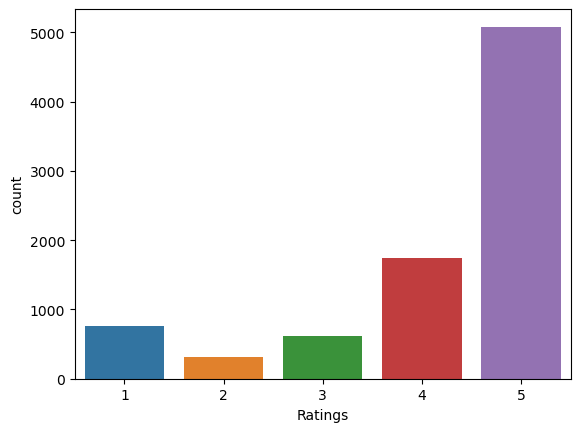

In [92]:
sns.countplot(x='Ratings', data=df)

# Ratings categorised into positive and negative

In [93]:
df['label'] = df['Ratings'].apply(lambda x: 'negative' if x <= 2 else 'positive')

#  STEP 1: Identifying Input and Output variables

### Independent variable

In [94]:
X=df[['Review text']]

### Target/Dependent variable

In [95]:
y=df[['label']]

# STEP 2: Train-Test Split

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=40)

In [98]:
X_train

,Review text
7961,Please rate very to mach.. products very goodR...
6263,good n genuine productREAD MORE
7092,it's goodREAD MORE
1741,GoodREAD MORE
1092,ExcellentREAD MORE
...,...
7839,Satisfying product one can easily rely on flip...
3603,Good product from yonexREAD MORE
5959,very low quality birdies. 3 out of the 6 birdi...
5426,Quality is goodREAD MORE


In [99]:
y_train

,label
7961,positive
6263,positive
7092,positive
1741,positive
1092,positive
...,...
7839,positive
3603,positive
5959,negative
5426,positive


In [100]:
X_test

,Review text
7666,Very nice to playREAD MORE
635,Best :)READ MORE
5751,Teriffic productREAD MORE
2117,GoodREAD MORE
1945,GoodREAD MORE
...,...
1858,GoodREAD MORE
3042,"We used to break 1 feather shuttle everyday, t..."
2201,Excellent productREAD MORE
5469,shuttles are very old. they damaged in one day...


In [101]:
y_test

,label
7666,positive
635,positive
5751,positive
2117,positive
1945,positive
...,...
1858,positive
3042,positive
2201,positive
5469,positive


# STEP 3 & 4:Data Preprocessing of Train data and Test data

In [102]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [103]:
stem = PorterStemmer()

In [104]:
lemma = WordNetLemmatizer()

In [105]:
def preprocess(data):
    
    # removes special characters
    sentence = re.sub("[^a-zA-Z]"," ",data)
    
    # converts words to lowercase
    sentence = sentence.lower()
    
    # tokenization
    sentence = sentence.split()
    
    #removes the stop words
    sentence = [word for word in sentence if word not in stopwords.words('english')]
    
    # can apply stem or lemm
    # applying lemmatization
    sentence = [lemma.lemmatize(word) for word in sentence]
    
    sentence=  " ".join(sentence)
    
    return sentence

## Applying preprocesing on train_data

In [106]:
X_train= X_train['Review text'].apply(preprocess)

## Applying preprocesing on test data

In [107]:
X_test = X_test['Review text'].apply(preprocess)

# CountVectorizer

## Converting Text data to Numerical data

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

In [109]:
cv = CountVectorizer()

In [110]:
%time X_train_num = cv.fit_transform(X_train)

CPU times: user 40.1 ms, sys: 4.02 ms, total: 44.2 ms
Wall time: 44 ms


In [111]:
%time X_test_num = cv.transform(X_test)

CPU times: user 14.7 ms, sys: 791 µs, total: 15.4 ms
Wall time: 14.8 ms


# Step 5 : Model Building:

# Implementing various Algorithms to find the Best Model

In [112]:
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from gensim.models import Word2Vec
from sklearn.metrics import f1_score

In [113]:
import warnings
warnings.filterwarnings('ignore')

In [114]:
import mlflow
mlflow.set_experiment("NLP_Sentiment_Analysis")

<Experiment: artifact_location='file:///Users/prashantheleshala/Desktop/DESKTOP/INTERNSHIP/INNOMATICS%20/ML_PROJECT/mlruns/312492107488539227', creation_time=1711458671628, experiment_id='312492107488539227', last_update_time=1711458671628, lifecycle_stage='active', name='NLP_Sentiment_Analysis', tags={}>

# Defining a memory object to cache Intermediate results

In [117]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
        'vectorization': [CountVectorizer(),TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'logistic_regression': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ]
}



In [118]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()


2024/03/26 21:13:55 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits


2024/03/26 21:14:02 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: user 3.61 s, sys: 1.56 s, total: 5.17 s
Wall time: 7.19 s
Train Score:  0.916313457293286
Test Score:  0.9177921315325895

********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits


2024/03/26 21:14:20 WARNING mlflow.sklearn: Unrecognized dataset type <class 'pandas.core.series.Series'>. Dataset logging skipped.


CPU times: user 14.7 s, sys: 2.31 s, total: 17 s
Wall time: 17.8 s
Train Score:  0.912055013827794
Test Score:  0.9060481503229595

********** logistic_regression **********
Fitting 5 folds for each of 72 candidates, totalling 360 fits
CPU times: user 18min 58s, sys: 8.81 s, total: 19min 7s
Wall time: 19min 5s
Train Score:  0.8950238256071138
Test Score:  0.8948913681738109

